In [1]:
from utils.tools import *

In [2]:
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_2_60.mpt']

In [4]:
mpt = mpt_data(path,data)

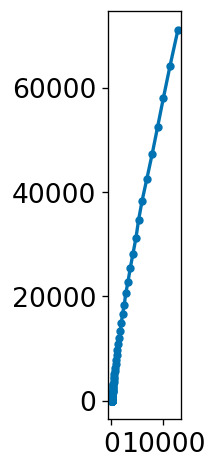

In [10]:
df = mpt.df_raw
mpt.EIS_plot()

In [9]:
df

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,...,|I|/A,(Q-Qo)/mA.h,Analog OUT/V,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 22
0,1.000019e+06,54.512085,12.467592,55.919659,-12.882680,1.644481,-0.035080,1.426269e-03,0.012765,0.000635,...,0.000017,3.447100e-07,0.0,-100.10986,0.017433,0.003987,0.017883,12.882680,3.447100e-07,NaN
1,8.912467e+05,54.781143,9.948639,55.677185,-10.293134,2.240487,-0.034646,1.666198e-03,0.017950,0.000573,...,0.000028,7.131817e-07,0.0,-100.11788,0.017672,0.003209,0.017961,10.293134,3.684718e-07,NaN
2,7.943327e+05,55.901787,8.067935,56.480984,-8.212415,2.836475,-0.034303,1.556177e-03,0.024834,0.000507,...,0.000045,1.085397e-06,0.0,-100.09383,0.017524,0.002529,0.017705,8.212415,3.722156e-07,NaN
3,7.079498e+05,57.193165,6.863119,57.603477,-6.842713,3.432488,-0.034021,1.485742e-03,0.032756,0.000465,...,0.000068,1.277489e-06,0.0,-100.06977,0.017236,0.002068,0.017360,6.842713,1.920919e-07,NaN
4,6.309568e+05,58.379940,6.027622,58.690285,-5.894797,4.028492,-0.033781,1.421811e-03,0.041848,0.000441,...,0.000098,1.444308e-06,0.0,-100.10986,0.016948,0.001750,0.017039,5.894797,1.668191e-07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.584685e+00,7832.707500,47199.789000,47845.285000,-80.577751,88.893994,-0.032893,-4.681060e-06,2.127830,2.070803,...,0.000003,1.034084e-05,0.0,-100.05373,0.000003,0.000021,0.000021,80.577751,-1.292154e-07,NaN
117,1.412238e+00,8873.412100,52384.191000,53130.414000,-80.385872,91.423164,-0.032897,7.205869e-06,2.151354,2.091347,...,0.000002,1.042559e-05,0.0,-100.07779,0.000003,0.000019,0.000019,80.385872,8.474895e-08,NaN
118,1.259674e+00,9995.331100,58012.574000,58867.355000,-80.224152,94.251954,-0.032894,-1.805065e-06,2.177909,2.115120,...,0.000002,1.040201e-05,0.0,-100.10184,0.000003,0.000017,0.000017,80.224152,-2.358587e-08,NaN
119,1.122486e+00,11278.340000,64216.504000,65199.391000,-80.038742,97.419985,-0.032894,4.672643e-06,2.207968,2.141899,...,0.000002,1.037314e-05,0.0,-100.09383,0.000003,0.000015,0.000015,80.038742,-2.887142e-08,NaN


In [12]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
mpt.EIS_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

NameError: name 'leastsq_errorfunc' is not defined